In [6]:
import numpy as np
import matplotlib.pyplot as plt
from arc import *  # Import ARC (Alkali Rydberg Calculator)

# documentation can be found here: https://arc-alkali-rydberg-calculator.readthedocs.io/en/latest/generated/arc.alkali_atom_data.Hydrogen.html

In [57]:
# define a function which convert eV into nm
def eV_to_nm(x):
  y = (1239.84198)/x
  return y

3.5
1.4546206284700003
852.3473101739875


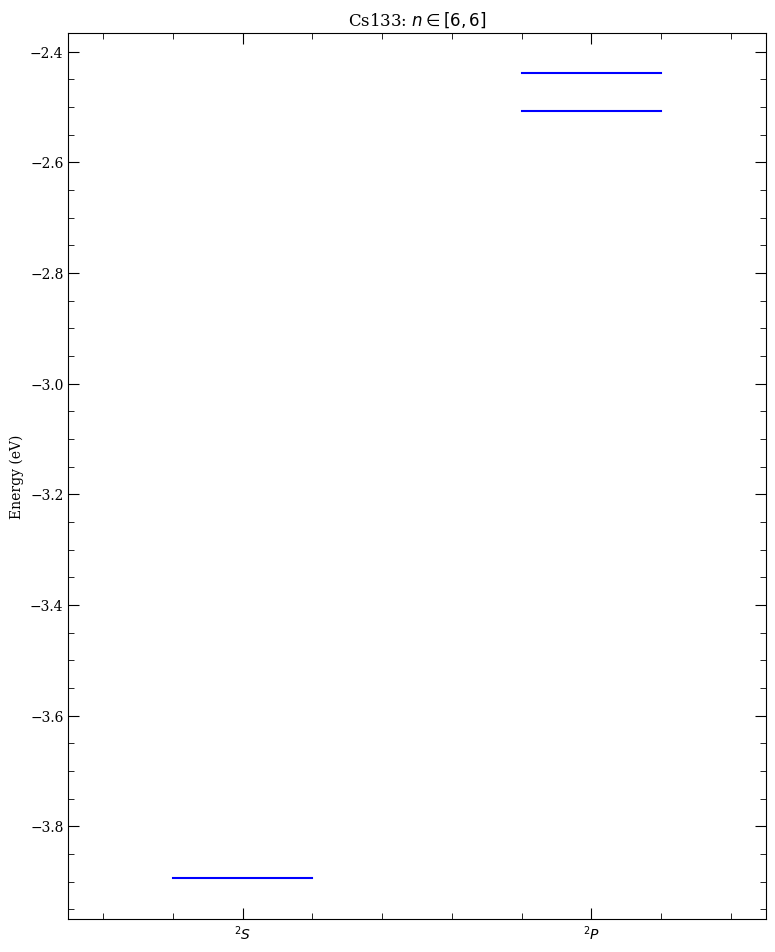

In [58]:
# Load parameters for Caesium
atom = Caesium()

nmin = 6  # Minimum n
nmax = 6  # Maximum n
lmin = 0  # Minimum l
lmax = 1  # Maxmium l

# return nuclear spin of Cs
print(atom.I)

# return energy of hyperfine spin state of Cs in eV - atom.getEnergy(n,l,j,s)

# For n=6 , l=0 => (J=1/2, F = 3,4 )
# For n=6 , l=1 => (J=1/2, F = 3,4 ) and (J=3/2, F = 2,3,4,5)

print( atom.getEnergy(6,1,1.5) - atom.getEnergy(6,0,0.5) )
print( eV_to_nm( atom.getEnergy(6,1,1.5) - atom.getEnergy(6,0,0.5) ))



# Plot Energy Levels of Cesium
levels = LevelPlot(atom)
levels.makeLevels(nmin, nmax, lmin, lmax)
levels.drawLevels()
levels.showPlot()


In [ ]:
# dipole matrix element for hyperfine transition
atom.getDipoleMatrixElementHFS(6,0,0.5,0.5,6,0,0.5,0.5)